Carregamento da Base de Dados

In [9]:
import numpy as np
import random
import pandas as pd


In [10]:
dataset = pd.read_csv('credit_data.csv')

In [11]:
dataset.shape

(2000, 5)

In [12]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [13]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

/tmp/ipython-input-1003466175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='c#default', data=dataset, palette='viridis') # Changed palette here


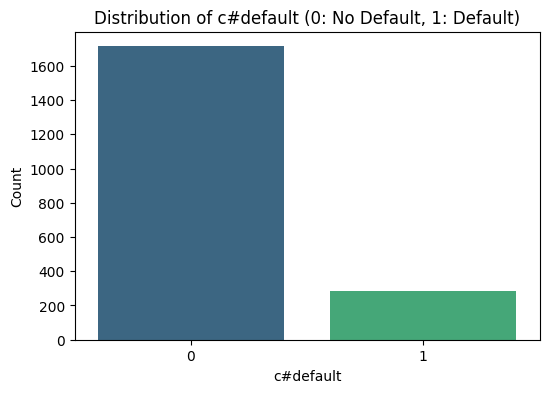

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='c#default', data=dataset, palette='viridis') # Changed palette here
plt.title('Distribution of c#default (0: No Default, 1: Default)')
plt.xlabel('c#default')
plt.ylabel('Count')
plt.show()

In [15]:
X = dataset.iloc[:, 1:4].values

In [16]:
X.shape

(1997, 3)

In [17]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [18]:
y = dataset.iloc[:, 4].values


In [19]:
y.shape

(1997,)

In [20]:
y

array([0, 0, 0, ..., 1, 0, 0])

Base de treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.2, stratify = y)

In [23]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [24]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [25]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [26]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [27]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [28]:
226 / len(y_treinamento), 82 / len(y_treinamento)

(0.14151534126487164, 0.05134627426424546)

In [29]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [30]:
57 / len(y_teste)

0.1425

Classificação com Naïve Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB


In [32]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [33]:
previsoes = modelo.predict(X_teste)

In [34]:
previsoes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [35]:
y_teste

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [37]:
accuracy_score(previsoes, y_teste)

0.9225

In [38]:
cm = confusion_matrix(previsoes, y_teste)
#previsoes corretas: 335 (0,0) e 37 (1,1)
#previsoes incorretas: 20 (1,0) e 8 (0,1)
cm

array([[338,  26],
       [  5,  31]])

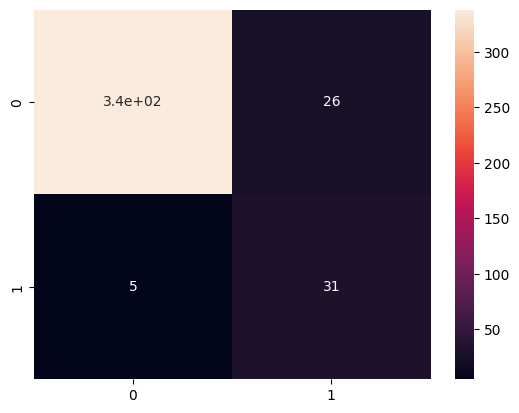

In [39]:
sns.heatmap(cm, annot=True);

In [40]:
(335 + 37) / (335 + 37 + 20 + 8)

0.93

In [41]:
336 / (336 + 20) # % de acerto para pessoas que pagam o emprestimo

0.9438202247191011

In [42]:
32 / (32 + 8) # % de acerto para pessoas que nao pagam o emprestimo

0.8

In [43]:
# Perdas: R$ 5.000 para cada emprestimo nao pago
# Clientes nao pagadores: 1000
1000 * (1- 0.8)

199.99999999999994

In [44]:
200 * 5000 #perda estimada - modelo esta dando um prejuizo de  R$ 1.000.000 porque está acertando somente 80% para pessoas que nao pagam emprestimo

1000000

Subamostragem (undersampling) - TomekLinks

In [45]:
from imblearn.under_sampling import TomekLinks

In [46]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [47]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [48]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [49]:
np.unique(y_under, return_counts=True)


(array([0, 1]), array([1614,  283]))

In [50]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2,stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [51]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9289473684210526

In [52]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[315,  19],
       [  8,  38]])

In [54]:
315 / (315 + 19)

0.9431137724550899

In [55]:
38 / (38 + 8)

0.8260869565217391

Sobreamostragem (oversampling) - SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [61]:
X_over.shape, y_over.shape
#

((3428, 3), (3428,))

In [63]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [64]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [65]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2,stratify=y_over)

In [66]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [68]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9198250728862973

In [69]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[300,  12],
       [ 43, 331]])

In [70]:
300 / (300 + 12)

0.9615384615384616

In [71]:
331 / (331 + 43)

0.8850267379679144

In [72]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 12 / 100

120.0

In [73]:
120 * 5000

600000

In [74]:
900000 - 600000


300000